In [1]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle


from pygenstability import run, constructors, plotting
from pygenstability.contrib.optimal_scales import *

In [2]:
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])+'/msfiltration'
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF

In [3]:
module_path = str(Path.cwd().parents[2])+  "/Software/AdGS"
if module_path not in sys.path:
    sys.path.append(module_path)

from adgs.utils import remove_self_loops

In [4]:
root_fig = '/home/tc/OneDrive/Software/Markov Stability Filtration/figures/'

# Import mobility baseline network

In [5]:
# Load data
root = '/home/tc/OneDrive/Software/AdGS/mobility/data/raw/mobility_data.pkl'

with open(root, 'rb') as handle:
    data = pickle.load(handle)

baseline_adjacency = data['baseline_adjacency']
pos = data['pos']
node_pop = data['node_pop']

In [6]:
graph = nx.from_numpy_array(remove_self_loops(baseline_adjacency.copy()), create_using=nx.DiGraph)

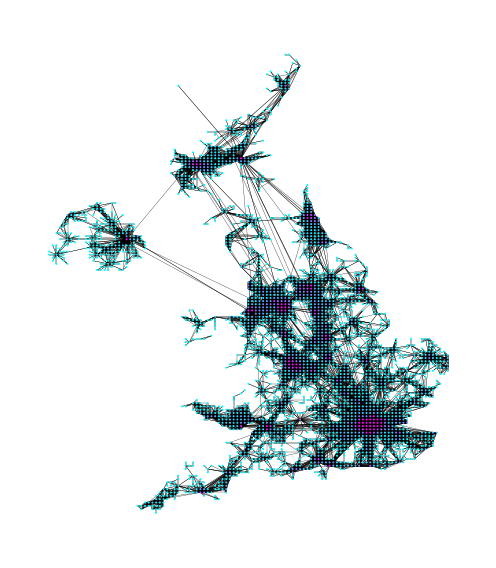

In [7]:
fig_x = 7
fig_y = 8
node_size = 1
width = 0.3

# Draw baseline network with population
fig, ax = plt.subplots(1,figsize =(fig_x,fig_y))
nx.draw(graph, ax=ax,pos=pos,node_size=node_size, width = width, arrows = False,
       node_color=node_pop, cmap = 'cool', vmax = np.percentile(node_pop,99) )
fig.tight_layout()
plt.show()

# MS analysis on baseline network


In [8]:
root_MS_mobility = '/home/tc/OneDrive/Software/Mobility Data Code/Results/GBR/Markov Stability/Run15/Run15_results.pkl'

# Load data (deserialize)
with open(root_MS_mobility, 'rb') as handle:
    all_results = pickle.load(handle)

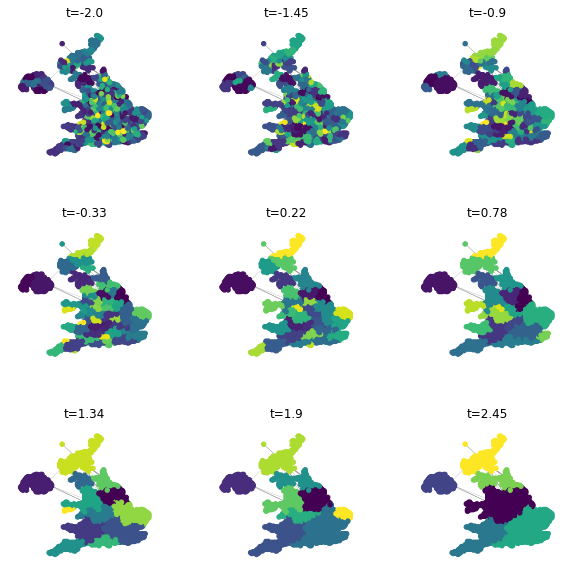

In [9]:
# Get times
times = all_results['times']
log_times = np.log10(all_results['times'])

# Get information about communities
community_id = all_results['community_id']
n_communities  = all_results['number_of_communities']

fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = int(i*len(times)/9)
    
    nx.draw(graph, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time])
    ax.set(title=r't={}'.format(np.around(np.log10(times[time]),2)))
plt.show()

[-1.73244147 -1.5819398  -0.47826087  1.37792642  2.5819398 ]


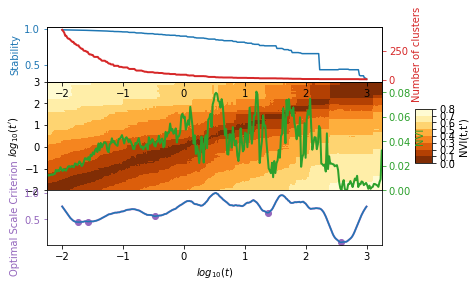

In [10]:
# select optimal scales
identify_optimal_scales(all_results,criterion_threshold=0.1,window_size=15)
selected_scales = log_times[all_results['selected_partitions']]
print(selected_scales)
plotting.plot_scan(all_results)
# plt.savefig(root_fig +'MS_Scan.pdf',bbox_inches='tight')

In [11]:
selected_paritions = all_results['selected_partitions'][1:]

In [12]:
n_communities = [len(np.unique(all_results['community_id'][i])) for i in range(len(times))]

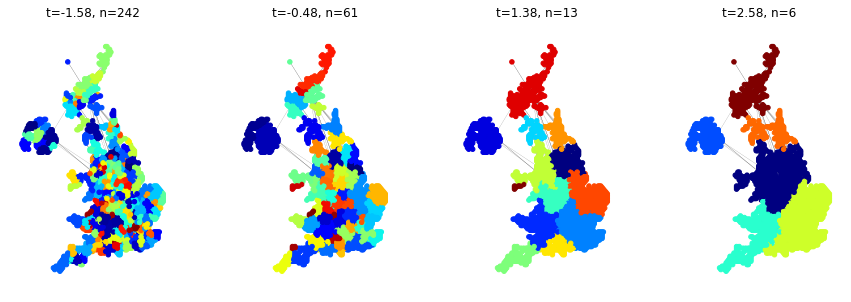

In [13]:
fig, axes = plt.subplots(1, len(selected_paritions), figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = selected_paritions[i]
    
    nx.draw(graph, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time],cmap = 'jet')
    ax.set(title=r't={}, n={}'.format(np.around(np.log10(times[time]),2), n_communities[time]))

# plt.savefig(root_fig +'Partitions_ScaleCrit.pdf', dpi=fig.dpi,bbox_inches='tight')

# Apply MSF framework

In [14]:
# Initialise MSF object
msf = MSF()

# Build filtration
msf.build_filtration(all_results, max_dim = 3)

 68%|██████▊   | 203/300 [31:02<1:15:12, 46.52s/it]

In [ ]:
with open("msf_mobility.pkl", 'wb') as handle:
    pickle.dump(msf, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
# Compute persistence
msf.compute_persistence()

Error: Canceled future for execute_request message before replies were done

In [51]:
# Select optimal scales
msf.select_scales()

In [55]:
msf.persistence

[]

In [52]:
# Plot persistence diagram with optimal scales
ax = gd.plot_persistence_diagram(msf.persistence)
ax.hlines(log_times[msf.optimal_scales],log_times[0],log_times[-1],color='gold',label='Optimal scales')
ax.legend()
#plt.savefig(root_fig +'Persistence_diagram.pdf', dpi=fig.dpi,bbox_inches='tight')

usetex mode requires dvipng.


IndexError: list index out of range

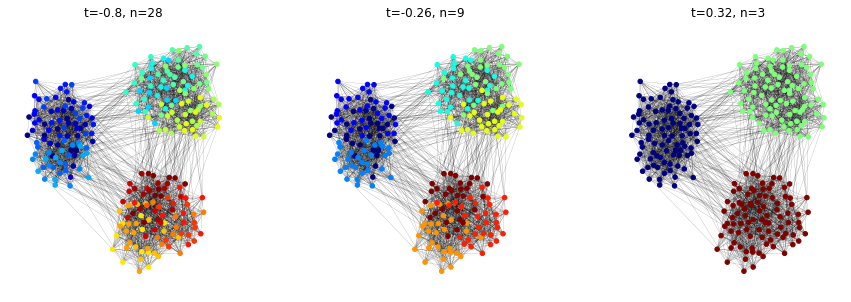

In [26]:
fig, axes = plt.subplots(1, len(msf.optimal_scales), figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = msf.optimal_scales[i] 
    
    nx.draw(graph, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time],cmap = 'jet')
    ax.set(title=r't={}, n={}'.format(np.around(np.log10(times[time]),2), n_communities[time]))

#plt.savefig(root_fig +'Partitions_PH.pdf', dpi=fig.dpi,bbox_inches='tight')